<a href="https://colab.research.google.com/github/yashyenugu/Stanford-Dogs-InceptionV3/blob/Edit-1/Dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:50px;">Classifying 120 Dog Breeds Using Transfer Learning</h1>

The Stanford Dogs dataset contains images of 120 breeds of dogs from around the world. This dataset has been built using images and annotation from ImageNet for the task of fine-grained image categorization. This dataset is being imported from Kaggle

The contents of the dataset are:
<ul>
  <li> <b>Number of categories</b>: 120 </li>
  <li> <b>Number of images</b>: 20,580 </li>
  </ul>

Since there are only about 170 images per category. It would be beneficial to use transfer learning.

I will be using the pre-trained model Inception V3 which has been trained on 'imagenet'. The weights will be freezed.

***Note-*** The code cells under the headings labeled '*skip' need not be executed if you only want to test the model without training

<h1 style="font-size:50px;">Importing the Dataset from Kaggle</h1>
*skip

The dataset can be found at <link>https://www.kaggle.com/jessicali9530/stanford-dogs-dataset</link>

In [ ]:
! pip install -q kaggle

Upload the kaggle.json file

In [ ]:
from google.colab import files
 
files.upload()

{}

In [ ]:
! mkdir ~/.kaggle
 
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d jessicali9530/stanford-dogs-dataset

100% 747M/750M [00:09<00:00, 61.2MB/s]
100% 750M/750M [00:09<00:00, 82.2MB/s]


In [ ]:
! mkdir dataset

In [ ]:
! unzip stanford-dogs-dataset.zip -d dataset
from IPython.display import clear_output
clear_output()

The dataset is now unzipped in the directory 'dataset' on the google colab machine

<h1 style="font-size:50px;">Importing necessary libraries</h1>

In [ ]:
import tensorflow as tf
from tensorflow import keras
 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.applications.vgg19 import preprocess_input
import numpy as np
import os
import matplotlib.pyplot as plt

<h1 style="font-size:50px;">Importing InceptionV3</h1>

Note that the images will be converted to 200 by 200 pixels for the neural network

In [ ]:
inception = tf.keras.applications.InceptionV3(input_shape = (200,200,3),include_top=False, weights='imagenet')
inception.trainable = False #The layers are frozen

87916544/87910968 [==============================] - 1s 0us/step


<h1 style="font-size:50px;">Importing Pre Trained Weights</h1>

The neural network has been trained to give 78% training accuracy and 72% test accuracy.<br>
In case we don't want to train the network, these weights can be used.

To upload the weights upload the files named ***'checkpoint', 'cp.ckpt.data-00000-of-00001' and 'cp.ckpt.index'*** given in the repository.

The weights can also be found here https://drive.google.com/drive/folders/1MmqaufhcOVJ3MqJhpYAqbnSA5gXrGx-X?usp=sharing

In [ ]:
from google.colab import files
files.upload()

NameError: ignored

In [ ]:
#checkpoint_path = "training_1/cp.ckpt"
save_path = '/content/cp.ckpt.index'
checkpoint_path = '/content/cp.ckpt.index'
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path,
                                                 save_weights_only=True,
                                                 verbose=1)

<h1 style="font-size:50px;">Image Data Augmentation</h1>
*skip

Data augmentation has been implemented using the ImageDataGenerator function to increase the amount of data

In [ ]:
train_data_dir = '/content/dataset/images/Images'

train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2,
                                   rotation_range = 10,
                                   zoom_range = 0.1,
                                   width_shift_range=0.2,
                                   height_shift_range = 0.2,
                                   horizontal_flip = True) #images are randomly rotated,flipped etc.

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(200, 200),
    batch_size=512, #mini-batches of size 512 images are used
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(200, 200),
    batch_size=512, #mini-batches of size 512 images
    class_mode='categorical',
    subset='validation') # set as validation data



NameError: ignored

<h1 style="font-size:50px;">Neural Network Model</h1>

The neural network has 3 Dense layers added to the Inceptionv3 network.<br>
Dropout has been implemented to prevent overfitting.

In [ ]:
model = tf.keras.Sequential([
                             inception, #inception layer
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dropout(rate=0.2), #Dropout layer
                             tf.keras.layers.Dense(240,activation='relu'),
                             tf.keras.layers.Dropout(rate=0.1), #Dropout layer
                             tf.keras.layers.Dense(240,activation = 'relu'),
                             tf.keras.layers.Dropout(rate=0), #Dropout layer
                             tf.keras.layers.Dense(120,activation = 'softmax')
                             
])


<h1 style="font-size:50px;">Loading the weights from the latest checkpoint</h1>

Run these cells to import the pre-trained weights

In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir)

In [ ]:
model.load_weights(latest)

<h1 style="font-size:50px;">Training the Model</h1>
*skip

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum = 0.99)

model.compile(optimizer = opt,loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = int(16508/512),
    validation_data = validation_generator, 
    validation_steps = int(4072/512),
    epochs = 10,
    callbacks=[cp_callback])

NameError: ignored

<h1 style="font-size:50px;">Visualizing Loss and Accuracy over time</h1>
*skip

Run the code below if you're training the network to visualize loss and accuracy over time

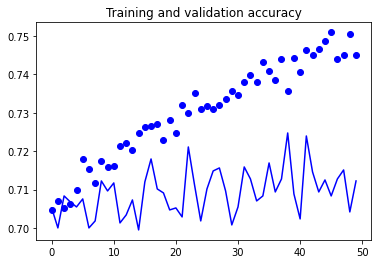

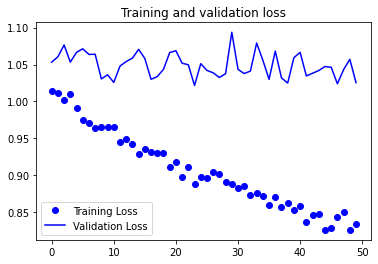

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<h1 style="font-size:50px;">Upload and Predict Images</h1>

In [1]:
breeds = ['Chihuahua', 'Japanese Spaniel', 'Maltese Dog', 'Pekinese', 'Shih-Tzu', 'Blenheim Spaniel', 'Papillon', 'Toy Terrier', 'Rhodesian Ridgeback', 'Afghan Hound', 'Basset', 'Beagle', 'Bloodhound', 'Bluetick', 'Black and Tan Coonhound', 'Walker Hound', 'English Foxhound', 'Redbone', 'Borzoi', 'Irish Wolfhound', 'Italian Greyhound', 'Whippet', 'Ibizan Hound', 'Norwegian Elkhound', 'Otterhound', 'Saluki', 'Scottish Deerhound', 'Weimaraner', 'Staffordshire Bullterrier', 'American Staffordshire Terrier', 'Bedlington Terrier', 'Border Terrier', 'Kerry blue Terrier', 'Irish Terrier', 'Norfolk  Terrier', 'Norwich Terrier', 'Yorkshire Terrier', 'Wire', 'Lakeland Terrier', 'Sealyham Terrier', 'Airedale Terrier', 'Cairn Terrier', 'Australian Terrier', 'Dandie Dinmont Terrier', 'Boston Bulldog', 'miniature Schnauzer', 'giant Schnauzer', 'standard Schnauzer', 'Scotch terrier', 'Tibetan terrier', 'Silky terrier', 'soft coated Wheaten terrier', 'West Highland white terrier', 'Lhasa', 'flat coated retriever', 'curly coated retriever', 'golden_retriever', 'Labrador retriever', 'Chesapeake Bay retriever', 'German short', 'Vizsla', 'English setter', 'Irish setter', 'Gordon setter', 'Brittany spaniel', 'clumber', 'English springer', 'Welsh springer spaniel', 'cocker Spaniel', 'Sussex Spaniel', 'Irish Water Spaniel', 'Kuvasz', 'Schipperke', 'Groenendael', 'Malinois', 'Briard', 'Australian Kelpie', 'Komondor', 'Old English Sheepdog', 'Shetland Sheepdog', 'Collie', 'Border Collie', 'Bouvier Des Flandres', 'Rottweiler', 'German_shepherd', 'Doberman', 'miniature Pinscher', 'Greater Swiss Mountain dog', 'Bernese mountain dog', 'Appenzeller', 'EntleBucher', 'Boxer', 'Bull Mastiff', 'Tibetan mastiff', 'French Bulldog', 'Great Dane', 'Saint Bernard', 'Eskimo', 'Malamute', 'Siberian Husky', 'Affenpinscher', 'Basenji', 'Pug', 'Leonberg', 'Newfoundland', 'Great Pyrenees', 'Samoyed', 'Pomeranian', 'Chow', 'Keeshond', 'Brabancon Griffon', 'Pembroke', 'Cardigan', 'Toy Poodle', 'Miniature poodle', 'Standard Poodle', 'Mexican Hairless', 'Dingo', 'Dhole', 'African hunting dog']

In [ ]:
def predict(img): 
  image = load_img(img,target_size = (200,200))
  image = img_to_array(image)
  image = np.expand_dims(image,axis = 0)
  image= image/255.0
 
  res = model.predict(image)
  result = np.argmax(res)
  print('The Dog Breed is ' + breeds[int(result)])

<p>Upload an image from your computer and witness the model trying to predict the breed of the dog.</p>
Run the following code blocks

In [ ]:
from google.colab import files
img = files.upload()

Saving chesapake-bay.jfif to chesapake-bay.jfif


In [ ]:
for fn in img.keys():
  path = '/content/'+fn

predict(path)

The Dog Breed is Chesapeake Bay retriever


Run the code below to check your image

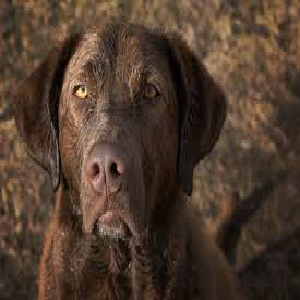

In [ ]:
load_img(path,target_size=(300,300))
